In [1]:
from matplotlib.ticker import LinearLocator, MultipleLocator, AutoMinorLocator
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
from adjustText import adjust_text
from astropy import units as u
import sys
import site
import matplotlib.pyplot as plt
from math import *
from tkinter import *
import astropy.units as u
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
fit_run = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\all-guesses.xlsx')
make_fit = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\all-final-var.xlsx')

In [3]:
data = pd.concat([fit_run, make_fit], axis=1)

In [4]:
data

,Source.Name,Date,averaging,Direction,Data type,distance_au,STEP,EPT,HET,Sigma,...,break_point_mev,break_point_err_mev,exp_cutoff_point_mev,cutoff_err_mev,alpha,year,month,day,time,fit
0,2020-11-17-0932-all-fit-variables_ept_het-peak...,2020-11-17,2min,sun,l2,0.93,True,True,True,3,...,0.080302,0.021194,NaN,NaN,3.990140,2020,11,17,932,best
1,2020-11-17-0932-all-fit-variables_ept_het-peak...,2020-11-17,5min,sun,l2,0.93,True,True,True,3,...,0.180523,0.926825,0.590908,0.896591,1.137462,2020,11,17,932,best
2,2020-11-17-0932-all-fit-variables_ept-peak-bes...,2020-11-17,1min,sun,l2,0.93,True,True,True,3,...,NaN,NaN,NaN,NaN,NaN,2020,11,17,932,best
3,2020-11-17-0932-all-fit-variables_ept-peak-bes...,2020-11-17,2min,sun,l2,0.93,True,True,True,3,...,0.080302,0.021194,NaN,NaN,3.990044,2020,11,17,932,best
4,2020-11-17-0932-all-fit-variables_ept-peak-bes...,2020-11-17,5min,sun,l2,0.93,True,True,True,3,...,0.124066,0.150197,NaN,NaN,1.480369,2020,11,17,932,best
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2022-03-14-1714-all-fit-variables_ept_het-peak...,2022-03-14,2min,sun,l2,0.41,False,True,True,3,...,NaN,NaN,0.576319,0.287430,NaN,2022,3,14,1714,best
349,2022-03-14-1714-all-fit-variables_ept_het-peak...,2022-03-14,5min,sun,l2,0.41,False,True,True,3,...,NaN,NaN,0.637153,0.290115,NaN,2022,3,14,1714,best
350,2022-03-14-1714-all-fit-variables_ept-peak-bes...,2022-03-14,1min,sun,l2,0.41,False,True,True,3,...,NaN,NaN,NaN,NaN,NaN,2022,3,14,1714,best
351,2022-03-14-1714-all-fit-variables_ept-peak-bes...,2022-03-14,2min,sun,l2,0.41,False,True,True,3,...,NaN,NaN,NaN,NaN,NaN,2022,3,14,1714,best


In [5]:
data.columns

Index(['Source.Name', 'Date', 'averaging', 'Direction', 'Data type',
       'distance_au', 'STEP', 'EPT', 'HET', 'Sigma', 'Relative error',
       'Fraction of nan', 'Leave first HET channel out', 'Shift STEP data',
       'type_of_fit', 'Fit to', 'Window', 'which_fit', 'gamma1_guess',
       'gamma2_guess', 'c1_guess', 'alpha_guess', 'break_guess_mev',
       'cutoff_guess_mev', 'Use random', 'Iterations', 'min_e_mev',
       'max_e_mev', 'Source.Name', 'final_fit_type', 'Reduced chi sq', 'c1',
       'c1_err', 'gamma1', 'gamma1_err', 'gamma2', 'gamma2_err',
       'break_point_mev', 'break_point_err_mev', 'exp_cutoff_point_mev',
       'cutoff_err_mev', 'alpha', 'year', 'month', 'day', 'time', 'fit'],
      dtype='object')

In [6]:
#step_ept_het = data.where( (data.type_of_fit == "step_ept_het") & (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.6859485403) , np.nan)
step_ept = data.where( (data.type_of_fit == "step_ept") & (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.07803193193) , np.nan)
ept_het = data.where((data.type_of_fit == "ept_het") & (data.Date >np.datetime64('2021-10-12')) , np.nan)
step = data.where( (data.type_of_fit == "step" ) , np.nan)
ept = data.where( (data.type_of_fit == "ept") , np.nan)

#step_ept_het = data.where((data.type_of_fit == "step_ept_het") & (data.Date >np.datetime64('2021-10-12')), np.nan)# & (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.6859485403) , np.nan)


#one_step_ept_het = step_ept_het.where((step_ept_het.averaging == "1min"), np.nan)
#two_step_ept_het = step_ept_het.where((step_ept_het.averaging == "2min"), np.nan)
#five_step_ept_het= step_ept_het.where((step_ept_het.averaging == "5min"), np.nan)

one_step_ept = step_ept.where((step_ept.averaging == "1min"), np.nan)
two_step_ept = step_ept.where((step_ept.averaging == "2min"), np.nan)
five_step_ept= step_ept.where((step_ept.averaging == "5min"), np.nan)

one_ept_het = ept_het.where((ept_het.averaging == "1min"), np.nan)
two_ept_het = ept_het.where((ept_het.averaging == "2min"), np.nan)
five_ept_het= ept_het.where((ept_het.averaging == "5min"), np.nan)

one_step = step.where((step.averaging == "1min"), np.nan)
two_step = step.where((step.averaging == "2min"), np.nan)
five_step= step.where((step.averaging == "5min"), np.nan)

one_ept = ept.where((ept.averaging == "1min"), np.nan)
two_ept = ept.where((ept.averaging == "2min"), np.nan)
five_ept= ept.where((ept.averaging == "5min"), np.nan)


In [7]:
five_ept.count()

Source.Name                    43
Date                           43
averaging                      43
Direction                      43
Data type                      43
distance_au                    43
STEP                           43
EPT                            43
HET                            43
Sigma                          43
Relative error                 43
Fraction of nan                43
Leave first HET channel out    43
Shift STEP data                 0
type_of_fit                    43
Fit to                         43
Window                         43
which_fit                      43
gamma1_guess                   43
gamma2_guess                   43
c1_guess                       43
alpha_guess                    43
break_guess_mev                43
cutoff_guess_mev               43
Use random                     43
Iterations                     43
min_e_mev                      43
max_e_mev                      43
Source.Name                    43
final_fit_type

In [8]:
ept = pd.DataFrame()

In [9]:
ept_one_two = []
ept_two_one = []
ept_one_two_err = []
ept_two_one_err = []
for i in range(len(one_ept.gamma1)):
    for j in range(len(two_ept.gamma1)):
        if one_ept.year[i]==two_ept.year[j] and one_ept.month[i]==two_ept.month[j] and one_ept.day[i]==two_ept.day[j] and one_ept.time[i]==two_ept.time[j]:
            ept_one_two.append(one_ept.gamma1[i])
            ept_two_one.append(two_ept.gamma1[j])
            ept_one_two_err.append(one_ept.gamma1_err[i])
            ept_two_one_err.append(two_ept.gamma1_err[j])           
            


In [10]:
step_ept_one_two = []
step_ept_two_one = []
step_ept_one_two_err = []
step_ept_two_one_err = []
for i in range(len(one_step_ept.gamma1)):
    for j in range(len(two_step_ept.gamma1)):
        if one_step_ept.year[i]==two_step_ept.year[j] and one_step_ept.month[i]==two_step_ept.month[j] and one_step_ept.day[i]==two_step_ept.day[j] and one_step_ept.time[i]==two_step_ept.time[j]:
            step_ept_one_two.append(one_step_ept.gamma1[i])
            step_ept_two_one.append(two_step_ept.gamma1[j])
            step_ept_one_two_err.append(one_step_ept.gamma1_err[i])
            step_ept_two_one_err.append(two_step_ept.gamma1_err[j])           
            


In [11]:
ept_het_one_two = []
ept_het_two_one = []
ept_het_one_two_err = []
ept_het_two_one_err = []
for i in range(len(one_ept_het.gamma1)):
    for j in range(len(two_ept_het.gamma1)):
        if one_ept_het.year[i]==two_ept_het.year[j] and one_ept_het.month[i]==two_ept_het.month[j] and one_ept_het.day[i]==two_ept_het.day[j] and one_ept_het.time[i]==two_ept_het.time[j]:
            ept_het_one_two.append(one_ept_het.gamma1[i])
            ept_het_two_one.append(two_ept_het.gamma1[j])
            ept_het_one_two_err.append(one_ept_het.gamma1_err[i])
            ept_het_two_one_err.append(two_ept_het.gamma1_err[j])           
            


In [ ]:
step_ept_het_one_two = []
step_ept_het_two_one = []
step_ept_het_one_two_err = []
step_ept_het_two_one_err = []
for i in range(len(one_step_ept_het.gamma1)):
    for j in range(len(two_step_ept_het.gamma1)):
        if one_step_ept_het.year[i]==two_step_ept_het.year[j] and one_step_ept_het.month[i]==two_step_ept_het.month[j] and one_step_ept_het.day[i]==two_step_ept_het.day[j] and one_step_ept_het.time[i]==two_step_ept_het.time[j]:
            step_ept_het_one_two.append(one_step_ept_het.gamma1[i])
            step_ept_het_two_one.append(two_step_ept_het.gamma1[j])
            step_ept_het_one_two_err.append(one_step_ept_het.gamma1_err[i])
            step_ept_het_two_one_err.append(two_step_ept_het.gamma1_err[j])           
            


In [12]:
step_one_two = []
step_two_one = []
step_one_two_err = []
step_two_one_err = []
for i in range(len(one_step.gamma1)):
    for j in range(len(two_step.gamma1)):
        if one_step.year[i]==two_step.year[j] and one_step.month[i]==two_step.month[j] and one_step.day[i]==two_step.day[j] and one_step.time[i]==two_step.time[j]:
            step_one_two.append(one_step.gamma1[i])
            step_two_one.append(two_step.gamma1[j])
            step_one_two_err.append(one_step.gamma1_err[i])
            step_two_one_err.append(two_step.gamma1_err[j])           


In [13]:
ept_one_five = []
ept_five_one = []
ept_one_five_err = []
ept_five_one_err = []

for i in range(len(one_ept.gamma1)):
    for j in range(len(five_ept.gamma1)):
        if one_ept.year[i]==five_ept.year[j] and one_ept.month[i]==five_ept.month[j] and one_ept.day[i]==five_ept.day[j] and one_ept.time[i]==five_ept.time[j]:
            ept_one_five.append(one_ept.gamma1[i])
            ept_five_one.append(five_ept.gamma1[j])
            ept_one_five_err.append(one_ept.gamma1_err[i])
            ept_five_one_err.append(five_ept.gamma1_err[j])                    

In [14]:
step_ept_one_five = []
step_ept_five_one = []
step_ept_one_five_err = []
step_ept_five_one_err = []

for i in range(len(one_step_ept.gamma1)):
    for j in range(len(five_step_ept.gamma1)):
        if one_step_ept.year[i]==five_step_ept.year[j] and one_step_ept.month[i]==five_step_ept.month[j] and one_step_ept.day[i]==five_step_ept.day[j] and one_step_ept.time[i]==five_step_ept.time[j]:
            step_ept_one_five.append(one_step_ept.gamma1[i])
            step_ept_five_one.append(five_step_ept.gamma1[j])
            step_ept_one_five_err.append(one_step_ept.gamma1_err[i])
            step_ept_five_one_err.append(five_step_ept.gamma1_err[j])                    

In [ ]:
step_ept_het_one_five = []
step_ept_het_five_one = []
step_ept_het_one_five_err = []
step_ept_het_five_one_err = []

for i in range(len(one_step_ept_het.gamma1)):
    for j in range(len(five_step_ept_het.gamma1)):
        if one_step_ept_het.year[i]==five_step_ept_het.year[j] and one_step_ept_het.month[i]==five_step_ept_het.month[j] and one_step_ept_het.day[i]==five_step_ept_het.day[j] and one_step_ept_het.time[i]==five_step_ept_het.time[j]:
            step_ept_het_one_five.append(one_step_ept_het.gamma1[i])
            step_ept_het_five_one.append(five_step_ept_het.gamma1[j])
            step_ept_het_one_five_err.append(one_step_ept_het.gamma1_err[i])
            step_ept_het_five_one_err.append(five_step_ept_het.gamma1_err[j])                    

In [15]:
ept_het_one_five = []
ept_het_five_one = []
ept_het_one_five_err = []
ept_het_five_one_err = []

for i in range(len(one_ept_het.gamma1)):
    for j in range(len(five_ept_het.gamma1)):
        if one_ept_het.year[i]==five_ept_het.year[j] and one_ept_het.month[i]==five_ept_het.month[j] and one_ept_het.day[i]==five_ept_het.day[j] and one_ept_het.time[i]==five_ept_het.time[j]:
            ept_het_one_five.append(one_ept_het.gamma1[i])
            ept_het_five_one.append(five_ept_het.gamma1[j])
            ept_het_one_five_err.append(one_ept_het.gamma1_err[i])
            ept_het_five_one_err.append(five_ept_het.gamma1_err[j])                    

In [16]:
step_one_five = []
step_five_one = []
step_one_five_err = []
step_five_one_err = []

for i in range(len(one_step.gamma1)):
    for j in range(len(five_step.gamma1)):
        if one_step.year[i]==five_step.year[j] and one_step.month[i]==five_step.month[j] and one_step.day[i]==five_step.day[j] and one_step.time[i]==five_step.time[j]:
            step_one_five.append(one_step.gamma1[i])
            step_five_one.append(five_step.gamma1[j])
            step_one_five_err.append(one_step.gamma1_err[i])
            step_five_one_err.append(five_step.gamma1_err[j])                    

In [17]:
ept_two_five = []
ept_five_two = []
ept_two_five_err = []
ept_five_two_err = []

for i in range(len(two_ept.gamma1)):
    for j in range(len(five_ept.gamma1)):
        if two_ept.year[i]==five_ept.year[j] and two_ept.month[i]==five_ept.month[j] and two_ept.day[i]==five_ept.day[j] and two_ept.time[i]==five_ept.time[j]:
            ept_two_five.append(two_ept.gamma1[i])
            ept_five_two.append(five_ept.gamma1[j])
            ept_two_five_err.append(two_ept.gamma1_err[i])
            ept_five_two_err.append(five_ept.gamma1_err[j])                    
                     

In [18]:
step_ept_two_five = []
step_ept_five_two = []
step_ept_two_five_err = []
step_ept_five_two_err = []

for i in range(len(two_step_ept.gamma1)):
    for j in range(len(five_step_ept.gamma1)):
        if two_step_ept.year[i]==five_step_ept.year[j] and two_step_ept.month[i]==five_step_ept.month[j] and two_step_ept.day[i]==five_step_ept.day[j] and two_step_ept.time[i]==five_step_ept.time[j]:
            step_ept_two_five.append(two_step_ept.gamma1[i])
            step_ept_five_two.append(five_step_ept.gamma1[j])
            step_ept_two_five_err.append(two_step_ept.gamma1_err[i])
            step_ept_five_two_err.append(five_step_ept.gamma1_err[j])                    
                     

In [ ]:
step_ept_het_two_five = []
step_ept_het_five_two = []
step_ept_het_two_five_err = []
step_ept_het_five_two_err = []

for i in range(len(two_step_ept_het.gamma1)):
    for j in range(len(five_step_ept_het.gamma1)):
        if two_step_ept_het.year[i]==five_step_ept_het.year[j] and two_step_ept_het.month[i]==five_step_ept_het.month[j] and two_step_ept_het.day[i]==five_step_ept_het.day[j] and two_step_ept_het.time[i]==five_step_ept_het.time[j]:
            step_ept_het_two_five.append(two_step_ept_het.gamma1[i])
            step_ept_het_five_two.append(five_step_ept_het.gamma1[j])
            step_ept_het_two_five_err.append(two_step_ept_het.gamma1_err[i])
            step_ept_het_five_two_err.append(five_step_ept_het.gamma1_err[j])                    
                     

In [19]:
ept_het_two_five = []
ept_het_five_two = []
ept_het_two_five_err = []
ept_het_five_two_err = []

for i in range(len(two_ept_het.gamma1)):
    for j in range(len(five_ept_het.gamma1)):
        if two_ept_het.year[i]==five_ept_het.year[j] and two_ept_het.month[i]==five_ept_het.month[j] and two_ept_het.day[i]==five_ept_het.day[j] and two_ept_het.time[i]==five_ept_het.time[j]:
            ept_het_two_five.append(two_ept_het.gamma1[i])
            ept_het_five_two.append(five_ept_het.gamma1[j])
            ept_het_two_five_err.append(two_ept_het.gamma1_err[i])
            ept_het_five_two_err.append(five_ept_het.gamma1_err[j])                    
                     

In [20]:
step_two_five = []
step_five_two = []
step_two_five_err = []
step_five_two_err = []

for i in range(len(two_step.gamma1)):
    for j in range(len(five_step.gamma1)):
        if two_step.year[i]==five_step.year[j] and two_step.month[i]==five_step.month[j] and two_step.day[i]==five_step.day[j] and two_step.time[i]==five_step.time[j]:
            step_two_five.append(two_step.gamma1[i])
            step_five_two.append(five_step.gamma1[j])
            step_two_five_err.append(two_step.gamma1_err[i])
            step_five_two_err.append(five_step.gamma1_err[j])                    


In [21]:
n_ept_one_two = str(len(ept_one_two))
n_ept_one_five = str(len(ept_one_five))
n_ept_two_five = str(len(ept_two_five))

n_step_ept_one_two = str(len(step_ept_one_two))
n_step_ept_one_five = str(len(step_ept_one_five))
n_step_ept_two_five = str(len(step_ept_two_five))

#n_step_ept_het_one_two = str(len(step_ept_het_one_two))
#n_step_ept_het_one_five = str(len(step_ept_het_one_five))
#n_step_ept_het_two_five = str(len(step_ept_het_two_five))

n_ept_het_one_two = str(len(ept_het_one_two))
n_ept_het_one_five = str(len(ept_het_one_five))
n_ept_het_two_five = str(len(ept_het_two_five))

n_step_one_two = str(len(step_one_two))
n_step_one_five = str(len(step_one_five))
n_step_two_five = str(len(step_two_five))

x = range(-20,10)
y = range(-20,10)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


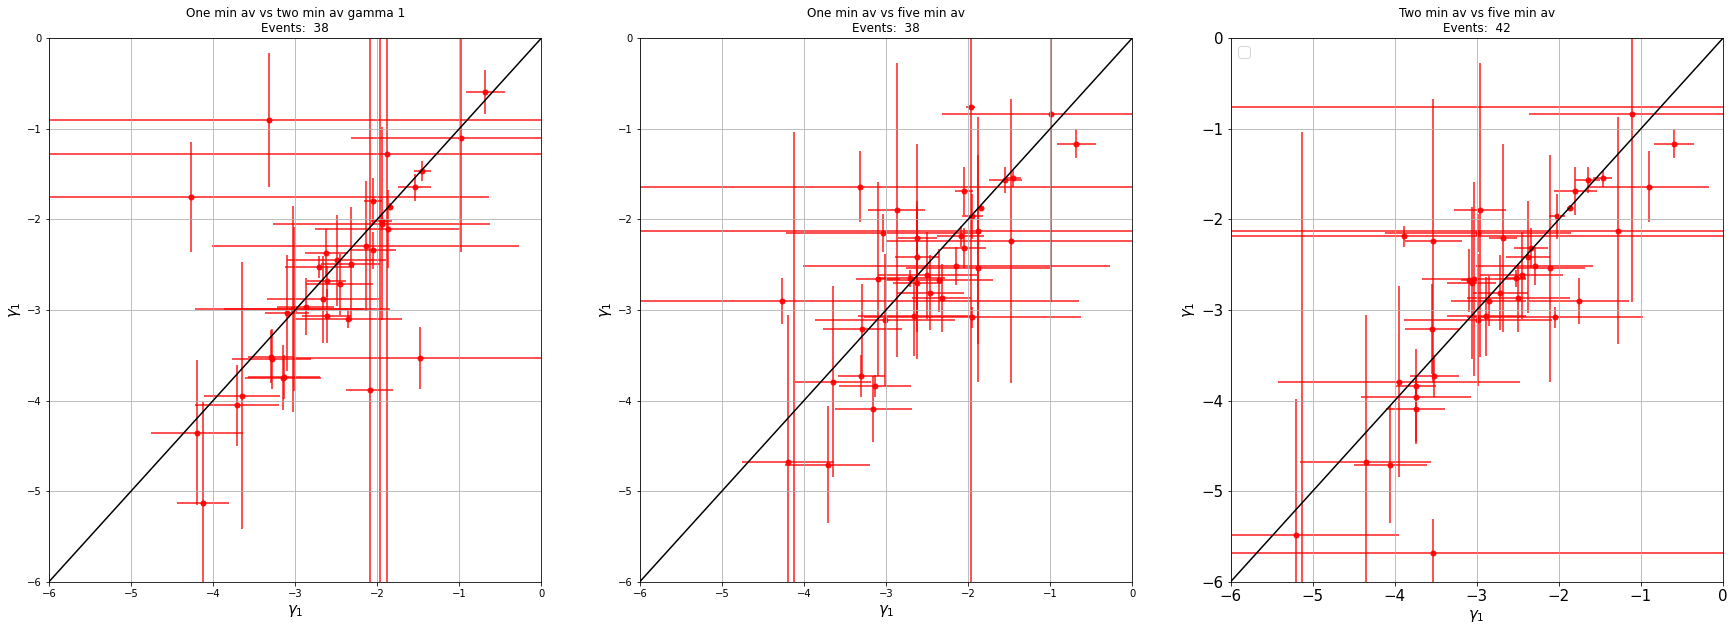

In [22]:
f, ax = plt.subplots(1,3, figsize=(30,10)) 

ax[0].errorbar(x=ept_one_two, y=ept_two_one, xerr=ept_one_two_err, yerr=ept_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9)#, label='Flux average')
#ax[0].errorbar(x=one_step_ept_c['break_point_mev'], y=one_step_ept_c['distance_au'], xerr=one_step_ept_c['break_point_err_mev'], color='blue', fmt='o', markersize=5, ecolor='blue', zorder=0, alpha=0.9)#, label='Flux average')

ax[0].plot(x,y, color = 'black')

#ax[0].errorbar(df_zero_err_one.break_point_mev, df_zero_err_one.gamma1, xerr=df_zero_err_one['break_point_err_mev'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
ax[0].set_xlabel(r'$\gamma_1$', size=15)
ax[0].set_ylabel(r'$\gamma_1$', size=15)
ax[0].set_title('One min av vs two min av gamma 1'+'\n'+'Events:  '+ n_ept_one_two)
ax[0].grid()
ax[0].set_xlim(-6,0)
ax[0].set_ylim(-6,0)

ax[1].errorbar(x=ept_one_five, y=ept_five_one,  xerr=ept_one_five_err, yerr=ept_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9)#, label='Flux average')
#ax[1].errorbar(x=two_step_ept_c['break_point_mev'], y=two_step_ept_c['distance_au'],  xerr=two_step_ept_c['break_point_err_mev'], color='blue', fmt='o', markersize=5, ecolor='blue', zorder=0, alpha=0.9)#, label='Flux average')
ax[1].plot(x,y, color = 'black')

#ax[1].errorbar(df_zero_err_two.break_point_mev, df_zero_err_two.gamma1, xerr=df_zero_err_two['break_point_err_mev'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
ax[1].set_xlabel(r'$\gamma_1$', size=15)
ax[1].set_ylabel(r'$\gamma_1$', size=15)
ax[1].set_title('One min av vs five min av'+'\n'+'Events:  '+ n_ept_one_five)
ax[1].grid()
ax[1].set_xlim(-6,0)
ax[1].set_ylim(-6,0)

ax[2].errorbar(x=ept_two_five, y=ept_five_two,  xerr=ept_two_five_err, yerr=ept_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9)#, label='Flux average')
#ax[2].errorbar(x=five_step_ept_c['break_point_mev'], y=five_step_ept_c['distance_au'],  xerr=five_step_ept_c['break_point_err_mev'], color='blue', fmt='o', markersize=5, ecolor='blue', zorder=0, alpha=0.9)#, label='Flux average')
ax[2].plot(x,y, color = 'black')

#ax[2].errorbar(df_zero_err_five.break_point_mev, df_zero_err_five.gamma1, xerr=df_zero_err_five['break_point_err_mev'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
ax[2].set_xlabel(r'$\gamma_1$', size=15)
ax[2].set_ylabel(r'$\gamma_1$', size=15)
ax[2].set_title('Two min av vs five min av'+'\n'+'Events:  '+ n_ept_two_five)
ax[2].grid()
ax[2].set_xlim(-6,0)
ax[2].set_ylim(-6,0)


plt.tick_params(axis='x', which='minor', labelsize=15)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.legend(prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)


#ax.set_ylim(-20,0)
#plt.title('Events:  '+ number+'  Zero err: '+ zero)
plt.show()


NameError: name 'step_ept_het_one_two' is not defined

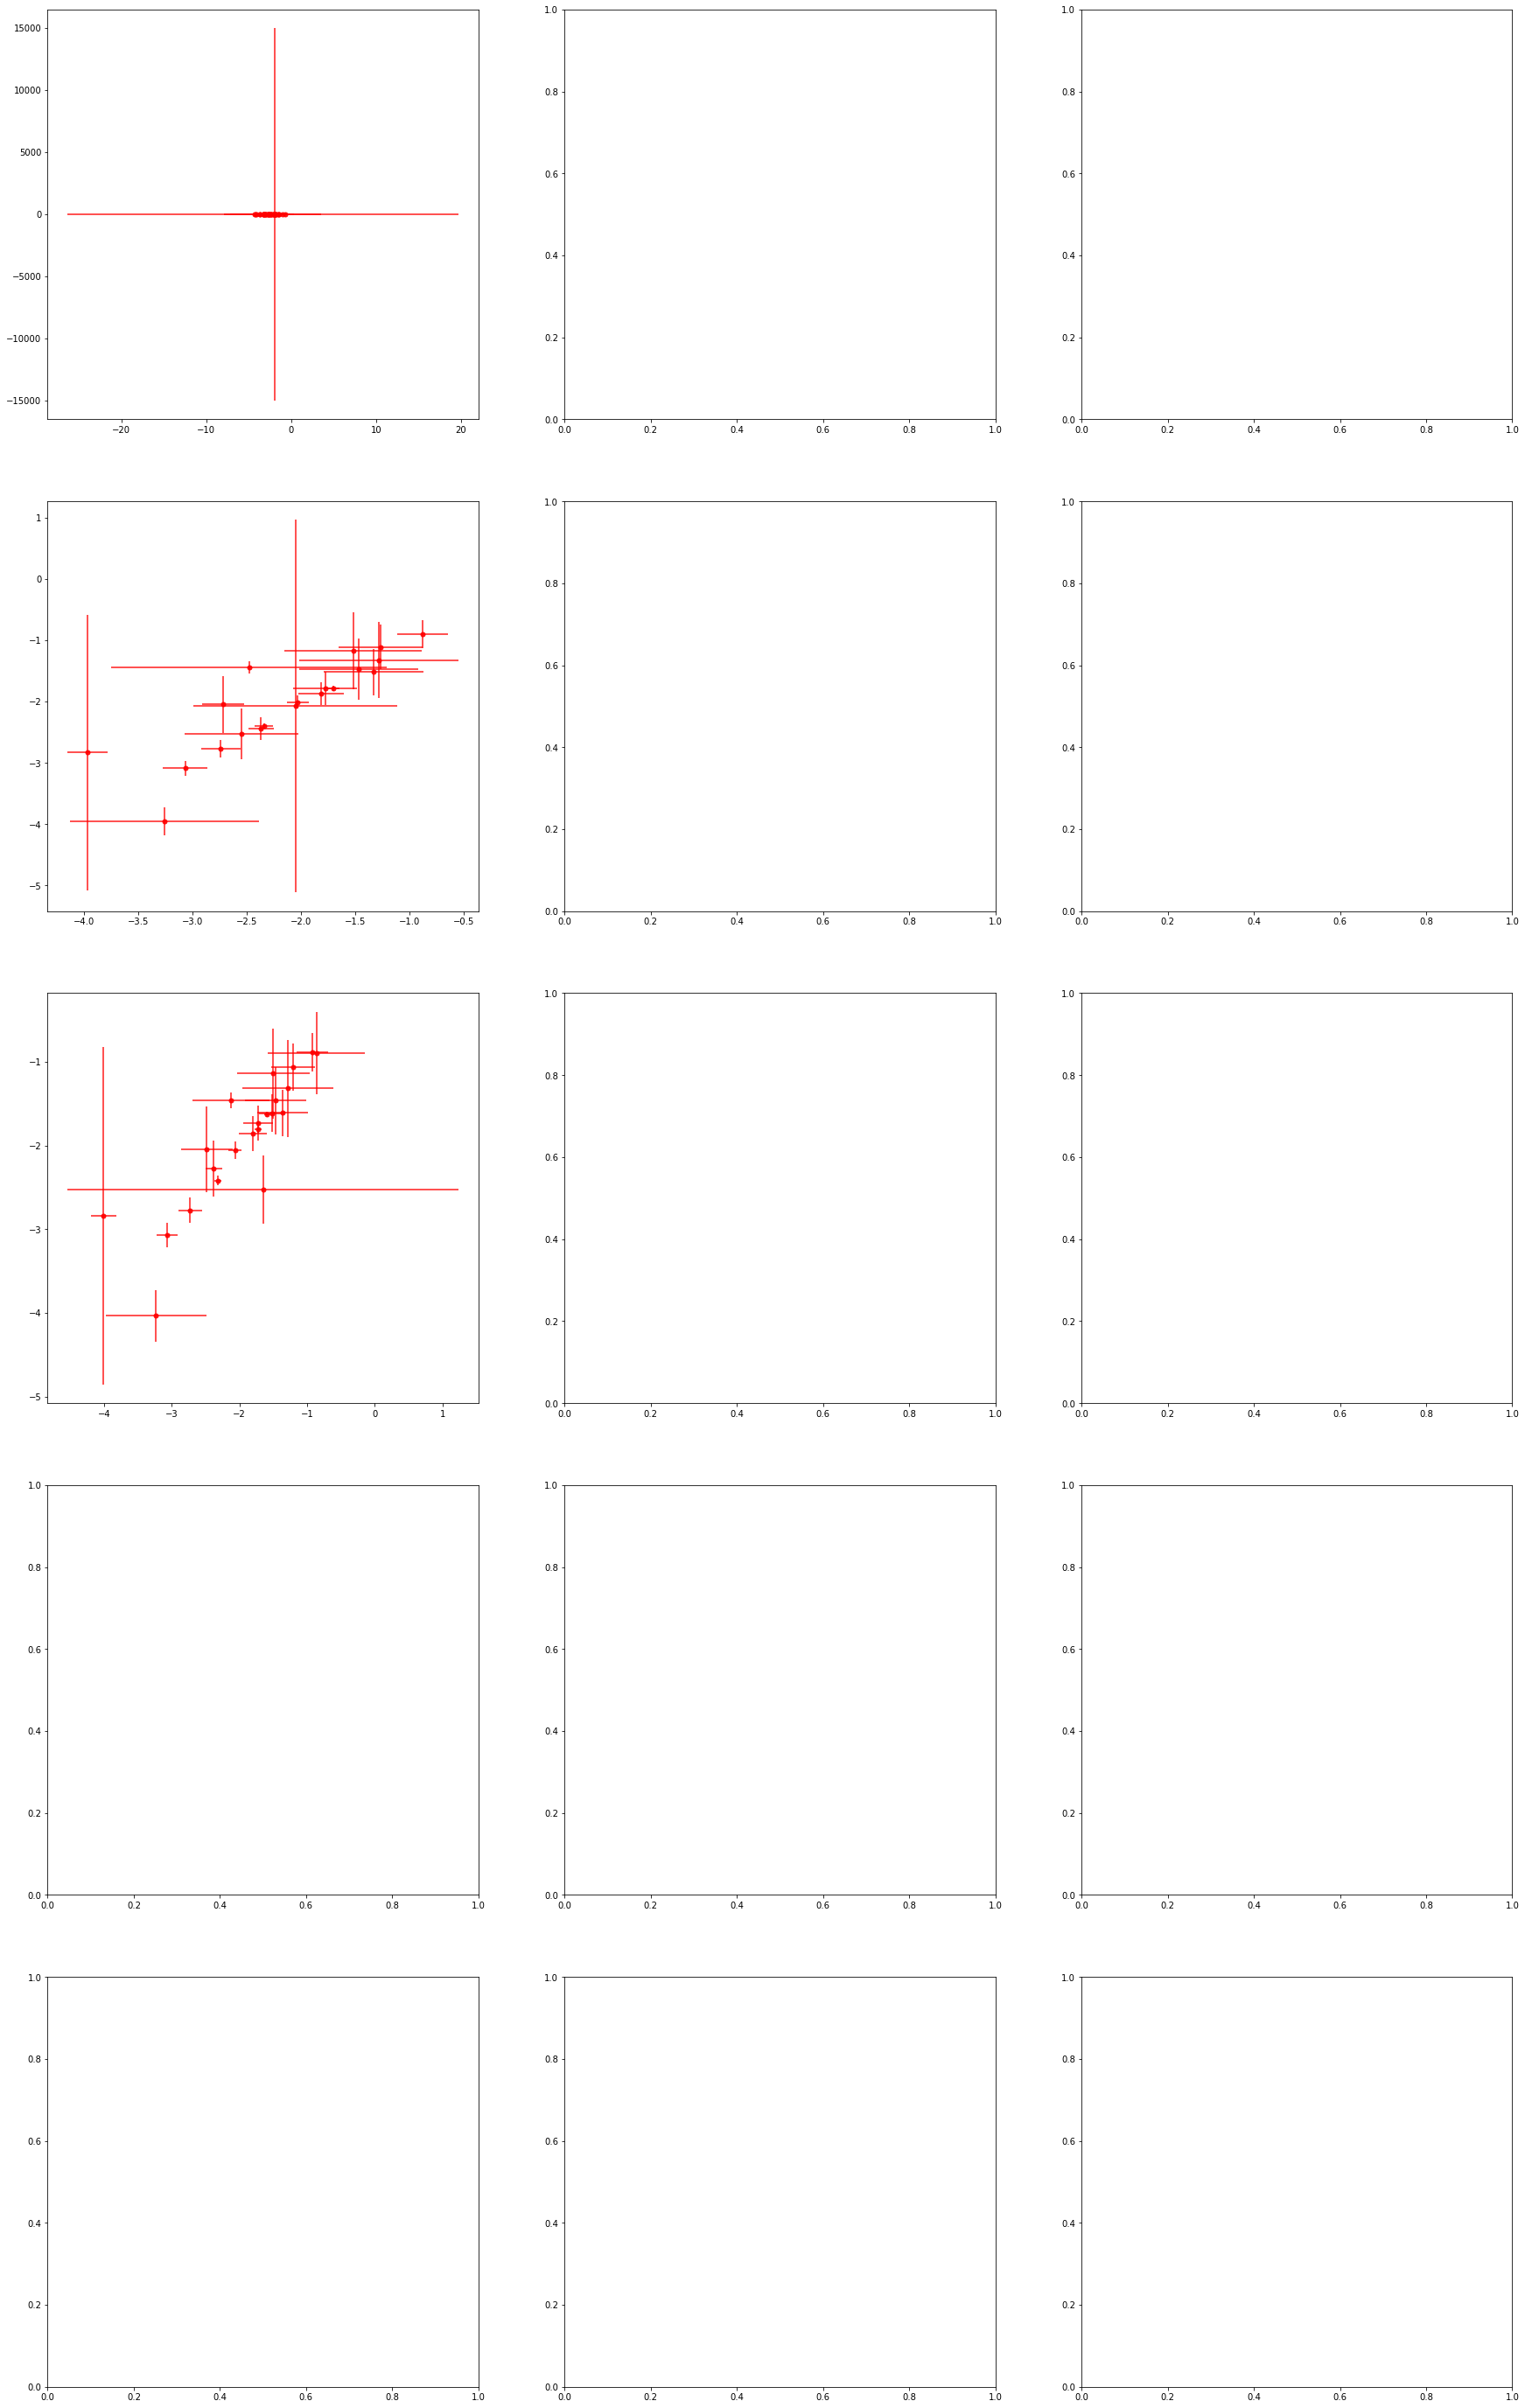

In [23]:

f, ax = plt.subplots(5,3, figsize=(30,50)) 

ax[0,0].errorbar(x=ept_one_two, y=ept_two_one, xerr=ept_one_two_err, yerr=ept_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept')#, label='Flux average')
ax[1,0].errorbar(x=step_one_two, y=step_two_one, xerr=step_one_two_err, yerr=step_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step')#, label='Flux average')
ax[2,0].errorbar(x=step_ept_one_two, y=step_ept_two_one, xerr=step_ept_one_two_err, yerr=step_ept_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept')#, label='Flux average')
ax[3,0].errorbar(x=step_ept_het_one_two, y=step_ept_het_two_one, xerr=step_ept_het_one_two_err, yerr=step_ept_het_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept het')#, label='Flux average')
ax[4,0].errorbar(x=ept_het_one_two, y=ept_het_two_one, xerr=ept_het_one_two_err, yerr=ept_het_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept het')#, label='Flux average')


ax[0,0].set_title('One min vs 2min av'+'\n'+'Events:  '+ n_ept_one_two)
ax[1,0].set_title('Events:  '+ n_step_one_two)
ax[2,0].set_title('Events:  '+ n_step_ept_one_two)
ax[3,0].set_title('Events:  '+ n_step_ept_het_one_two)
ax[4,0].set_title('Events:  '+ n_ept_het_one_two)

  
for i in range(5):
    ax[i,0].set_xlabel(r'$\gamma_1$', size=15)
    ax[i,0].set_ylabel(r'$\gamma_1$', size=15)  
    ax[i,0].grid()
    ax[i,0].legend(prop={'size': 15})
    ax[i,0].plot(x,y, color = 'black')
    ax[i,0].set_xlim(-6,0)
    ax[i,0].set_ylim(-6,0)



ax[0,1].errorbar(x=ept_one_five, y=ept_five_one, xerr=ept_one_five_err, yerr=ept_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept')#, label='Flux average')
ax[1,1].errorbar(x=step_one_five, y=step_five_one, xerr=step_one_five_err, yerr=step_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step')#, label='Flux average')
ax[2,1].errorbar(x=step_ept_one_five, y=step_ept_five_one, xerr=step_ept_one_five_err, yerr=step_ept_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept')#, label='Flux average')
ax[3,1].errorbar(x=step_ept_het_one_five, y=step_ept_het_five_one, xerr=step_ept_het_one_five_err, yerr=step_ept_het_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept het')#, label='Flux average')
ax[4,1].errorbar(x=ept_het_one_five, y=ept_het_five_one, xerr=ept_het_one_five_err, yerr=ept_het_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept het')#, label='Flux average')

ax[0,1].set_title('One min vs 5min av'+'\n'+'Events:  '+ n_ept_one_five)
ax[1,1].set_title('Events:  '+ n_step_one_five)
ax[2,1].set_title('Events:  '+ n_step_ept_one_five)
ax[3,1].set_title('Events:  '+ n_step_ept_het_one_five)
ax[4,1].set_title('Events:  '+ n_ept_het_one_five)
    
for i in range(5):
    ax[i,1].set_xlabel(r'$\gamma_1$', size=15)
    ax[i,1].set_ylabel(r'$\gamma_1$', size=15)
    ax[i,1].grid()
    ax[i,1].legend(prop={'size': 15})
    ax[i,1].plot(x,y, color = 'black')
    ax[i,1].set_xlim(-6,0)
    ax[i,1].set_ylim(-6,0)



ax[0,2].errorbar(x=ept_two_five, y=ept_five_two, xerr=ept_two_five_err, yerr=ept_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept')#, label='Flux average')
ax[1,2].errorbar(x=step_two_five, y=step_five_two, xerr=step_two_five_err, yerr=step_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step')#, label='Flux average')
ax[2,2].errorbar(x=step_ept_two_five, y=step_ept_five_two, xerr=step_ept_two_five_err, yerr=step_ept_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept')#, label='Flux average')
ax[3,2].errorbar(x=step_ept_het_two_five, y=step_ept_het_five_two, xerr=step_ept_het_two_five_err, yerr=step_ept_het_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept het')#, label='Flux average')
ax[4,2].errorbar(x=ept_het_two_five, y=ept_het_five_two, xerr=ept_het_two_five_err, yerr=ept_het_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept het')#, label='Flux average')

#ax[0].errorbar(x=one_step_ept_c['break_point_mev'], y=one_step_ept_c['distance_au'], xerr=one_step_ept_c['break_point_err_mev'], color='blue', fmt='o', markersize=5, ecolor='blue', zorder=0, alpha=0.9)#, label='Flux average')
ax[0,2].set_title('Two min vs 5min av'+'\n'+'Events:  '+ n_ept_two_five)
ax[1,2].set_title('Events:  '+ n_step_two_five)
ax[2,2].set_title('Events:  '+ n_step_ept_two_five)
ax[3,2].set_title('Events:  '+ n_step_ept_het_two_five)
ax[4,2].set_title('Events:  '+ n_ept_het_two_five)
    

#ax[0].errorbar(df_zero_err_one.break_point_mev, df_zero_err_one.gamma1, xerr=df_zero_err_one['break_point_err_mev'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
for i in range(5):
    ax[i,2].set_xlabel(r'$\gamma_1$', size=15)
    ax[i,2].set_ylabel(r'$\gamma_1$', size=15)
    ax[i,2].grid()
    ax[i,2].legend(prop={'size': 15})
    ax[i,2].plot(x,y, color = 'black')
    ax[i,2].set_xlim(-6,0)
    ax[i,2].set_ylim(-6,0)




plt.tick_params(axis='x', which='minor', labelsize=15)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

plt.xticks(size=15)
plt.yticks(size=15)


#ax.set_ylim(-20,0)
#plt.title('Events:  '+ number+'  Zero err: '+ zero)
plt.show()


In [ ]:
f, ax = plt.subplots(4,3, figsize=(30,40)) 

ax[0,0].errorbar(x=ept_one_two, y=ept_two_one, xerr=ept_one_two_err, yerr=ept_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept')#, label='Flux average')
ax[1,0].errorbar(x=step_one_two, y=step_two_one, xerr=step_one_two_err, yerr=step_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step')#, label='Flux average')
ax[2,0].errorbar(x=step_ept_one_two, y=step_ept_two_one, xerr=step_ept_one_two_err, yerr=step_ept_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept')#, label='Flux average')
#ax[3,0].errorbar(x=step_ept_het_one_two, y=step_ept_het_two_one, xerr=step_ept_het_one_two_err, yerr=step_ept_het_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept het')#, label='Flux average')
ax[3,0].errorbar(x=ept_het_one_two, y=ept_het_two_one, xerr=ept_het_one_two_err, yerr=ept_het_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept het')#, label='Flux average')


ax[0,0].set_title('One min vs 2min av'+'\n'+'Events:  '+ n_ept_one_two)
ax[1,0].set_title('Events:  '+ n_step_one_two)
ax[2,0].set_title('Events:  '+ n_step_ept_one_two)
#ax[3,0].set_title('Events:  '+ n_step_ept_het_one_two)
ax[3,0].set_title('Events:  '+ n_ept_het_one_two)

  
for i in range(4):
    ax[i,0].set_xlabel(r'$\gamma_1$', size=15)
    ax[i,0].set_ylabel(r'$\gamma_1$', size=15)  
    ax[i,0].grid()
    ax[i,0].legend(prop={'size': 15})
    ax[i,0].plot(x,y, color = 'black')
    ax[i,0].set_xlim(-6,0)
    ax[i,0].set_ylim(-6,0)



ax[0,1].errorbar(x=ept_one_five, y=ept_five_one, xerr=ept_one_five_err, yerr=ept_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept')#, label='Flux average')
ax[1,1].errorbar(x=step_one_five, y=step_five_one, xerr=step_one_five_err, yerr=step_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step')#, label='Flux average')
ax[2,1].errorbar(x=step_ept_one_five, y=step_ept_five_one, xerr=step_ept_one_five_err, yerr=step_ept_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept')#, label='Flux average')
#ax[3,1].errorbar(x=step_ept_het_one_five, y=step_ept_het_five_one, xerr=step_ept_het_one_five_err, yerr=step_ept_het_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept het')#, label='Flux average')
ax[3,1].errorbar(x=ept_het_one_five, y=ept_het_five_one, xerr=ept_het_one_five_err, yerr=ept_het_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept het')#, label='Flux average')

ax[0,1].set_title('One min vs 5min av'+'\n'+'Events:  '+ n_ept_one_five)
ax[1,1].set_title('Events:  '+ n_step_one_five)
ax[2,1].set_title('Events:  '+ n_step_ept_one_five)
#ax[3,1].set_title('Events:  '+ n_step_ept_het_one_five)
ax[3,1].set_title('Events:  '+ n_ept_het_one_five)
    
for i in range(4):
    ax[i,1].set_xlabel(r'$\gamma_1$', size=15)
    ax[i,1].set_ylabel(r'$\gamma_1$', size=15)
    ax[i,1].grid()
    ax[i,1].legend(prop={'size': 15})
    ax[i,1].plot(x,y, color = 'black')
    ax[i,1].set_xlim(-6,0)
    ax[i,1].set_ylim(-6,0)



ax[0,2].errorbar(x=ept_two_five, y=ept_five_two, xerr=ept_two_five_err, yerr=ept_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept')#, label='Flux average')
ax[1,2].errorbar(x=step_two_five, y=step_five_two, xerr=step_two_five_err, yerr=step_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step')#, label='Flux average')
ax[2,2].errorbar(x=step_ept_two_five, y=step_ept_five_two, xerr=step_ept_two_five_err, yerr=step_ept_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept')#, label='Flux average')
#ax[3,2].errorbar(x=step_ept_het_two_five, y=step_ept_het_five_two, xerr=step_ept_het_two_five_err, yerr=step_ept_het_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept het')#, label='Flux average')
ax[3,2].errorbar(x=ept_het_two_five, y=ept_het_five_two, xerr=ept_het_two_five_err, yerr=ept_het_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept het')#, label='Flux average')

#ax[0].errorbar(x=one_step_ept_c['break_point_mev'], y=one_step_ept_c['distance_au'], xerr=one_step_ept_c['break_point_err_mev'], color='blue', fmt='o', markersize=5, ecolor='blue', zorder=0, alpha=0.9)#, label='Flux average')
ax[0,2].set_title('Two min vs 5min av'+'\n'+'Events:  '+ n_ept_two_five)
ax[1,2].set_title('Events:  '+ n_step_two_five)
ax[2,2].set_title('Events:  '+ n_step_ept_two_five)
#ax[3,2].set_title('Events:  '+ n_step_ept_het_two_five)
ax[3,2].set_title('Events:  '+ n_ept_het_two_five)
    

#ax[0].errorbar(df_zero_err_one.break_point_mev, df_zero_err_one.gamma1, xerr=df_zero_err_one['break_point_err_mev'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
for i in range(4):
    ax[i,2].set_xlabel(r'$\gamma_1$', size=15)
    ax[i,2].set_ylabel(r'$\gamma_1$', size=15)
    ax[i,2].grid()
    ax[i,2].legend(prop={'size': 15})
    ax[i,2].plot(x,y, color = 'black')
    ax[i,2].set_xlim(-6,0)
    ax[i,2].set_ylim(-6,0)




plt.tick_params(axis='x', which='minor', labelsize=15)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

plt.xticks(size=15)
plt.yticks(size=15)


#ax.set_ylim(-20,0)
#plt.title('Events:  '+ number+'  Zero err: '+ zero)
plt.show()


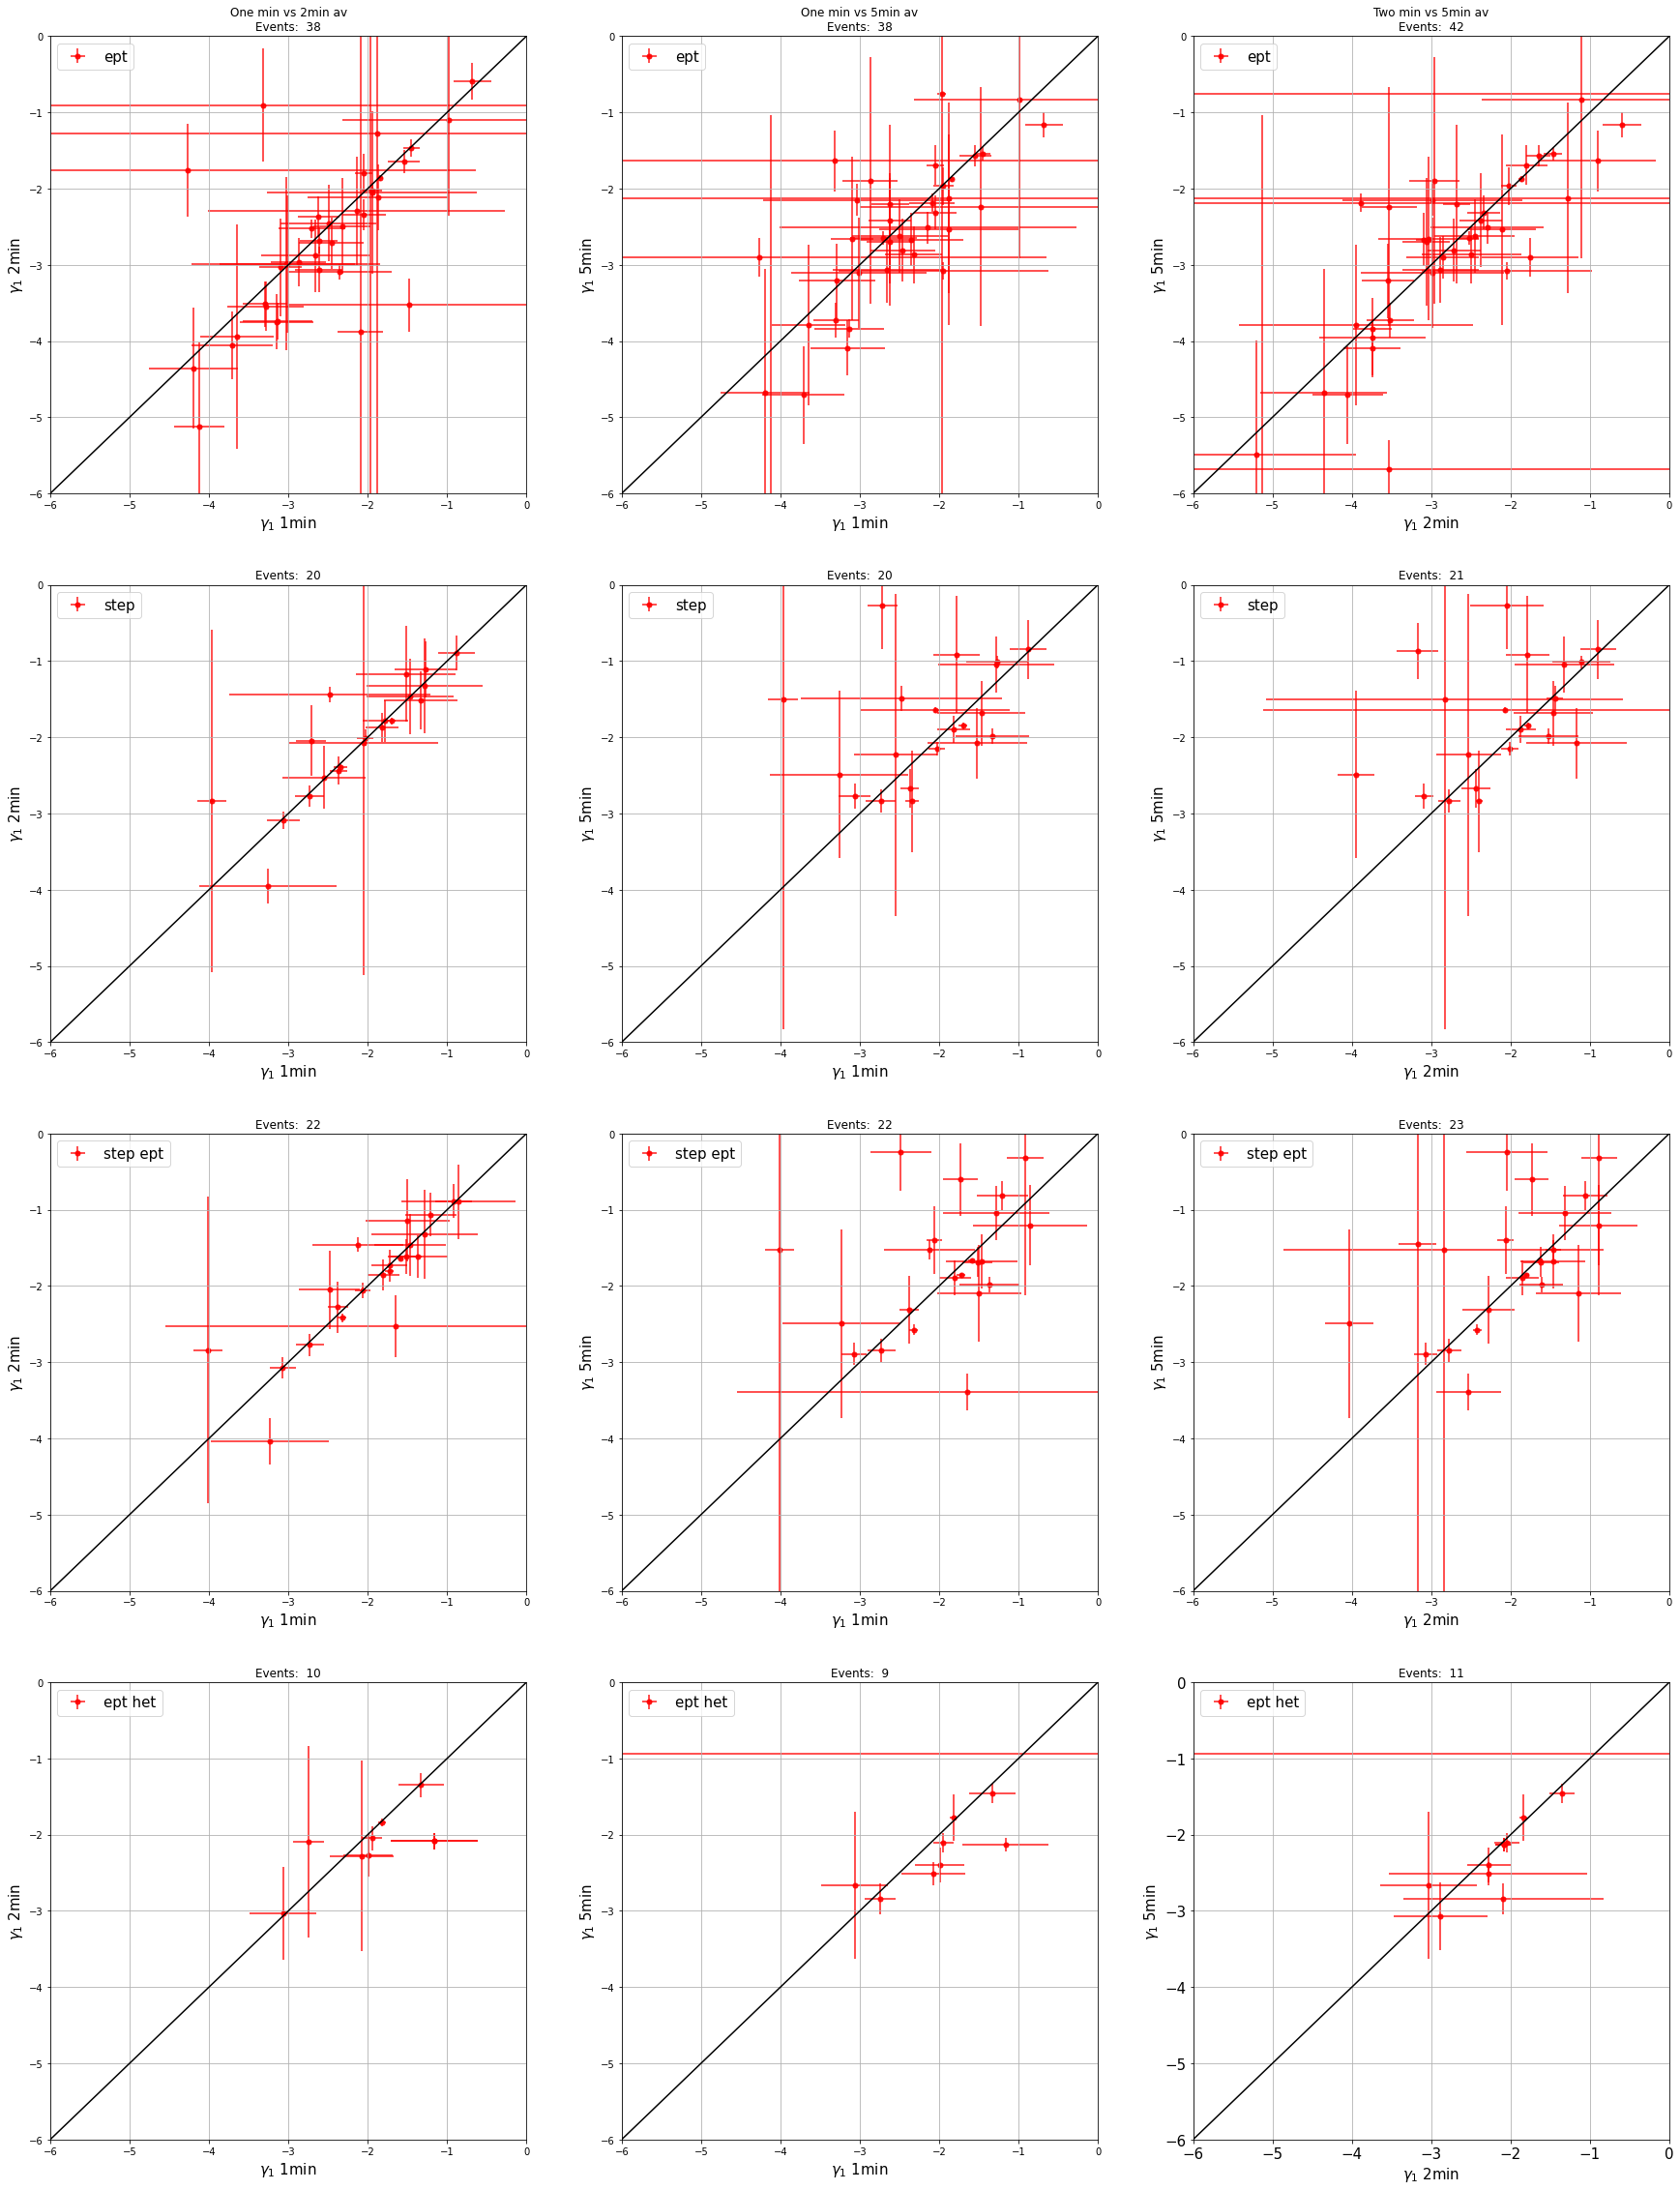

In [26]:
f, ax = plt.subplots(4,3, figsize=(30,40)) 

ax[0,0].errorbar(x=ept_one_two, y=ept_two_one, xerr=ept_one_two_err, yerr=ept_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept')#, label='Flux average')
ax[1,0].errorbar(x=step_one_two, y=step_two_one, xerr=step_one_two_err, yerr=step_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step')#, label='Flux average')
ax[2,0].errorbar(x=step_ept_one_two, y=step_ept_two_one, xerr=step_ept_one_two_err, yerr=step_ept_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept')#, label='Flux average')
ax[3,0].errorbar(x=ept_het_one_two, y=ept_het_two_one, xerr=ept_het_one_two_err, yerr=ept_het_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept het')#, label='Flux average')


ax[0,0].set_title('One min vs 2min av'+'\n'+'Events:  '+ n_ept_one_two)
ax[1,0].set_title('Events:  '+ n_step_one_two)
ax[2,0].set_title('Events:  '+ n_step_ept_one_two)
ax[3,0].set_title('Events:  '+ n_ept_het_one_two)

  
for i in range(4):
    ax[i,0].set_xlabel(r'$\gamma_1$ 1min', size=15)
    ax[i,0].set_ylabel(r'$\gamma_1$ 2min', size=15)  
    ax[i,0].grid()
    ax[i,0].legend(prop={'size': 15})
    ax[i,0].plot(x,y, color = 'black')
    ax[i,0].set_xlim(-6,0)
    ax[i,0].set_ylim(-6,0)



ax[0,1].errorbar(x=ept_one_five, y=ept_five_one, xerr=ept_one_five_err, yerr=ept_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept')#, label='Flux average')
ax[1,1].errorbar(x=step_one_five, y=step_five_one, xerr=step_one_five_err, yerr=step_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step')#, label='Flux average')
ax[2,1].errorbar(x=step_ept_one_five, y=step_ept_five_one, xerr=step_ept_one_five_err, yerr=step_ept_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept')#, label='Flux average')
ax[3,1].errorbar(x=ept_het_one_five, y=ept_het_five_one, xerr=ept_het_one_five_err, yerr=ept_het_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept het')#, label='Flux average')

ax[0,1].set_title('One min vs 5min av'+'\n'+'Events:  '+ n_ept_one_five)
ax[1,1].set_title('Events:  '+ n_step_one_five)
ax[2,1].set_title('Events:  '+ n_step_ept_one_five)
ax[3,1].set_title('Events:  '+ n_ept_het_one_five)
    
for i in range(4):
    ax[i,1].set_xlabel(r'$\gamma_1$ 1min', size=15)
    ax[i,1].set_ylabel(r'$\gamma_1$ 5min', size=15)
    ax[i,1].grid()
    ax[i,1].legend(prop={'size': 15})
    ax[i,1].plot(x,y, color = 'black')
    ax[i,1].set_xlim(-6,0)
    ax[i,1].set_ylim(-6,0)



ax[0,2].errorbar(x=ept_two_five, y=ept_five_two, xerr=ept_two_five_err, yerr=ept_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept')#, label='Flux average')
ax[1,2].errorbar(x=step_two_five, y=step_five_two, xerr=step_two_five_err, yerr=step_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step')#, label='Flux average')
ax[2,2].errorbar(x=step_ept_two_five, y=step_ept_five_two, xerr=step_ept_two_five_err, yerr=step_ept_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept')#, label='Flux average')
ax[3,2].errorbar(x=ept_het_two_five, y=ept_het_five_two, xerr=ept_het_two_five_err, yerr=ept_het_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept het')#, label='Flux average')

ax[0,2].set_title('Two min vs 5min av'+'\n'+'Events:  '+ n_ept_two_five)
ax[1,2].set_title('Events:  '+ n_step_two_five)
ax[2,2].set_title('Events:  '+ n_step_ept_two_five)
ax[3,2].set_title('Events:  '+ n_ept_het_two_five)
    

for i in range(4):
    ax[i,2].set_xlabel(r'$\gamma_1$ 2min', size=15)
    ax[i,2].set_ylabel(r'$\gamma_1$ 5min', size=15)
    ax[i,2].grid()
    ax[i,2].legend(prop={'size': 15})
    ax[i,2].plot(x,y, color = 'black')
    ax[i,2].set_xlim(-6,0)
    ax[i,2].set_ylim(-6,0)




plt.tick_params(axis='x', which='minor', labelsize=15)

plt.xticks(size=15)
plt.yticks(size=15)

plt.show()


In [24]:
mean52_step = 0.23067791069410662
std52_step = 0.6742726815323722
mean51_step =  0.34502961246141534
std51_step = 0.8493359382521738
mean12_step = -0.11435170176730863
std12_step = 0.412677042710774

mean52_ept = 0.2126791676664949
std52_ept = 2.2686898488490885
mean51_ept = -0.1312785621338991
std51_ept = 0.6955338709500812
mean12_ept = 0.4576257840528635
std12_ept = 2.2339583150582936

mean52_step_ept = 0.20439450016459915
std52_step_ept = 0.6960446459770767
mean51_step_ept =  0.22567898212496565
std51_step_ept = 0.8883124456312025
mean12_step_ept = -0.021284481960366534
std12_step_ept = 0.40735947458109667

mean52_ept_het = -0.9458795491477462
std52_ept_het = 3.0167137501424395
mean51_ept_het =  -0.8516179809412319
std51_ept_het = 2.9331426356449164
mean12_ept_het = -0.15412257255882217
std12_ept_het = 0.5150901988570656


In [25]:
y12_ept = []
y51_ept = []
y52_ept = []

spanmin12_ept = []
spanmin51_ept = []
spanmin52_ept = []

spanmax12_ept =[]
spanmax51_ept =[]
spanmax52_ept =[]

y12_step = []
y51_step = []
y52_step = []

spanmin12_step = []
spanmin51_step = []
spanmin52_step = []

spanmax12_step =[]
spanmax51_step =[]
spanmax52_step =[]

y12_step_ept = []
y51_step_ept = []
y52_step_ept = []

spanmin12_step_ept = []
spanmin51_step_ept = []
spanmin52_step_ept = []

spanmax12_step_ept =[]
spanmax51_step_ept =[]
spanmax52_step_ept =[]

y12_ept_het = []
y51_ept_het = []
y52_ept_het = []

spanmin12_ept_het = []
spanmin51_ept_het = []
spanmin52_ept_het = []

spanmax12_ept_het =[]
spanmax51_ept_het =[]
spanmax52_ept_het =[]


for i in x:
    y12_ept.append(i+mean12_ept)
    y51_ept.append(i+mean51_ept)
    y52_ept.append(i+mean52_ept)
    
    spanmin12_ept.append(i+mean12_ept-std12_ept)
    spanmin51_ept.append(i+mean51_ept-std51_ept)
    spanmin52_ept.append(i+mean52_ept-std52_ept)
    
    spanmax12_ept.append(i+mean12_ept+std12_ept)
    spanmax51_ept.append(i+mean51_ept+std51_ept)
    spanmax52_ept.append(i+mean52_ept+std52_ept)
    
    y12_step.append(i+mean12_step)
    y51_step.append(i+mean51_step)
    y52_step.append(i+mean52_step)
    
    spanmin12_step.append(i+mean12_step-std12_step)
    spanmin51_step.append(i+mean51_step-std51_step)
    spanmin52_step.append(i+mean52_step-std52_step)
    
    spanmax12_step.append(i+mean12_step+std12_step)
    spanmax51_step.append(i+mean51_step+std51_step)
    spanmax52_step.append(i+mean52_step+std52_step)
    
    y12_step_ept.append(i+mean12_step_ept)
    y51_step_ept.append(i+mean51_step_ept)
    y52_step_ept.append(i+mean52_step_ept)
    
    spanmin12_step_ept.append(i+mean12_step_ept-std12_step_ept)
    spanmin51_step_ept.append(i+mean51_step_ept-std51_step_ept)
    spanmin52_step_ept.append(i+mean52_step_ept-std52_step_ept)
    
    spanmax12_step_ept.append(i+mean12_step_ept+std12_step_ept)
    spanmax51_step_ept.append(i+mean51_step_ept+std51_step_ept)
    spanmax52_step_ept.append(i+mean52_step_ept+std52_step_ept)
    
    y12_ept_het.append(i+mean12_ept_het)
    y51_ept_het.append(i+mean51_ept_het)
    y52_ept_het.append(i+mean52_ept_het)
    
    spanmin12_ept_het.append(i+mean12_ept_het-std12_ept_het)
    spanmin51_ept_het.append(i+mean51_ept_het-std51_ept_het)
    spanmin52_ept_het.append(i+mean52_ept_het-std52_ept_het)
    
    spanmax12_ept_het.append(i+mean12_ept_het+std12_ept_het)
    spanmax51_ept_het.append(i+mean51_ept_het+std51_ept_het)
    spanmax52_ept_het.append(i+mean52_ept_het+std52_ept_het)
    
    

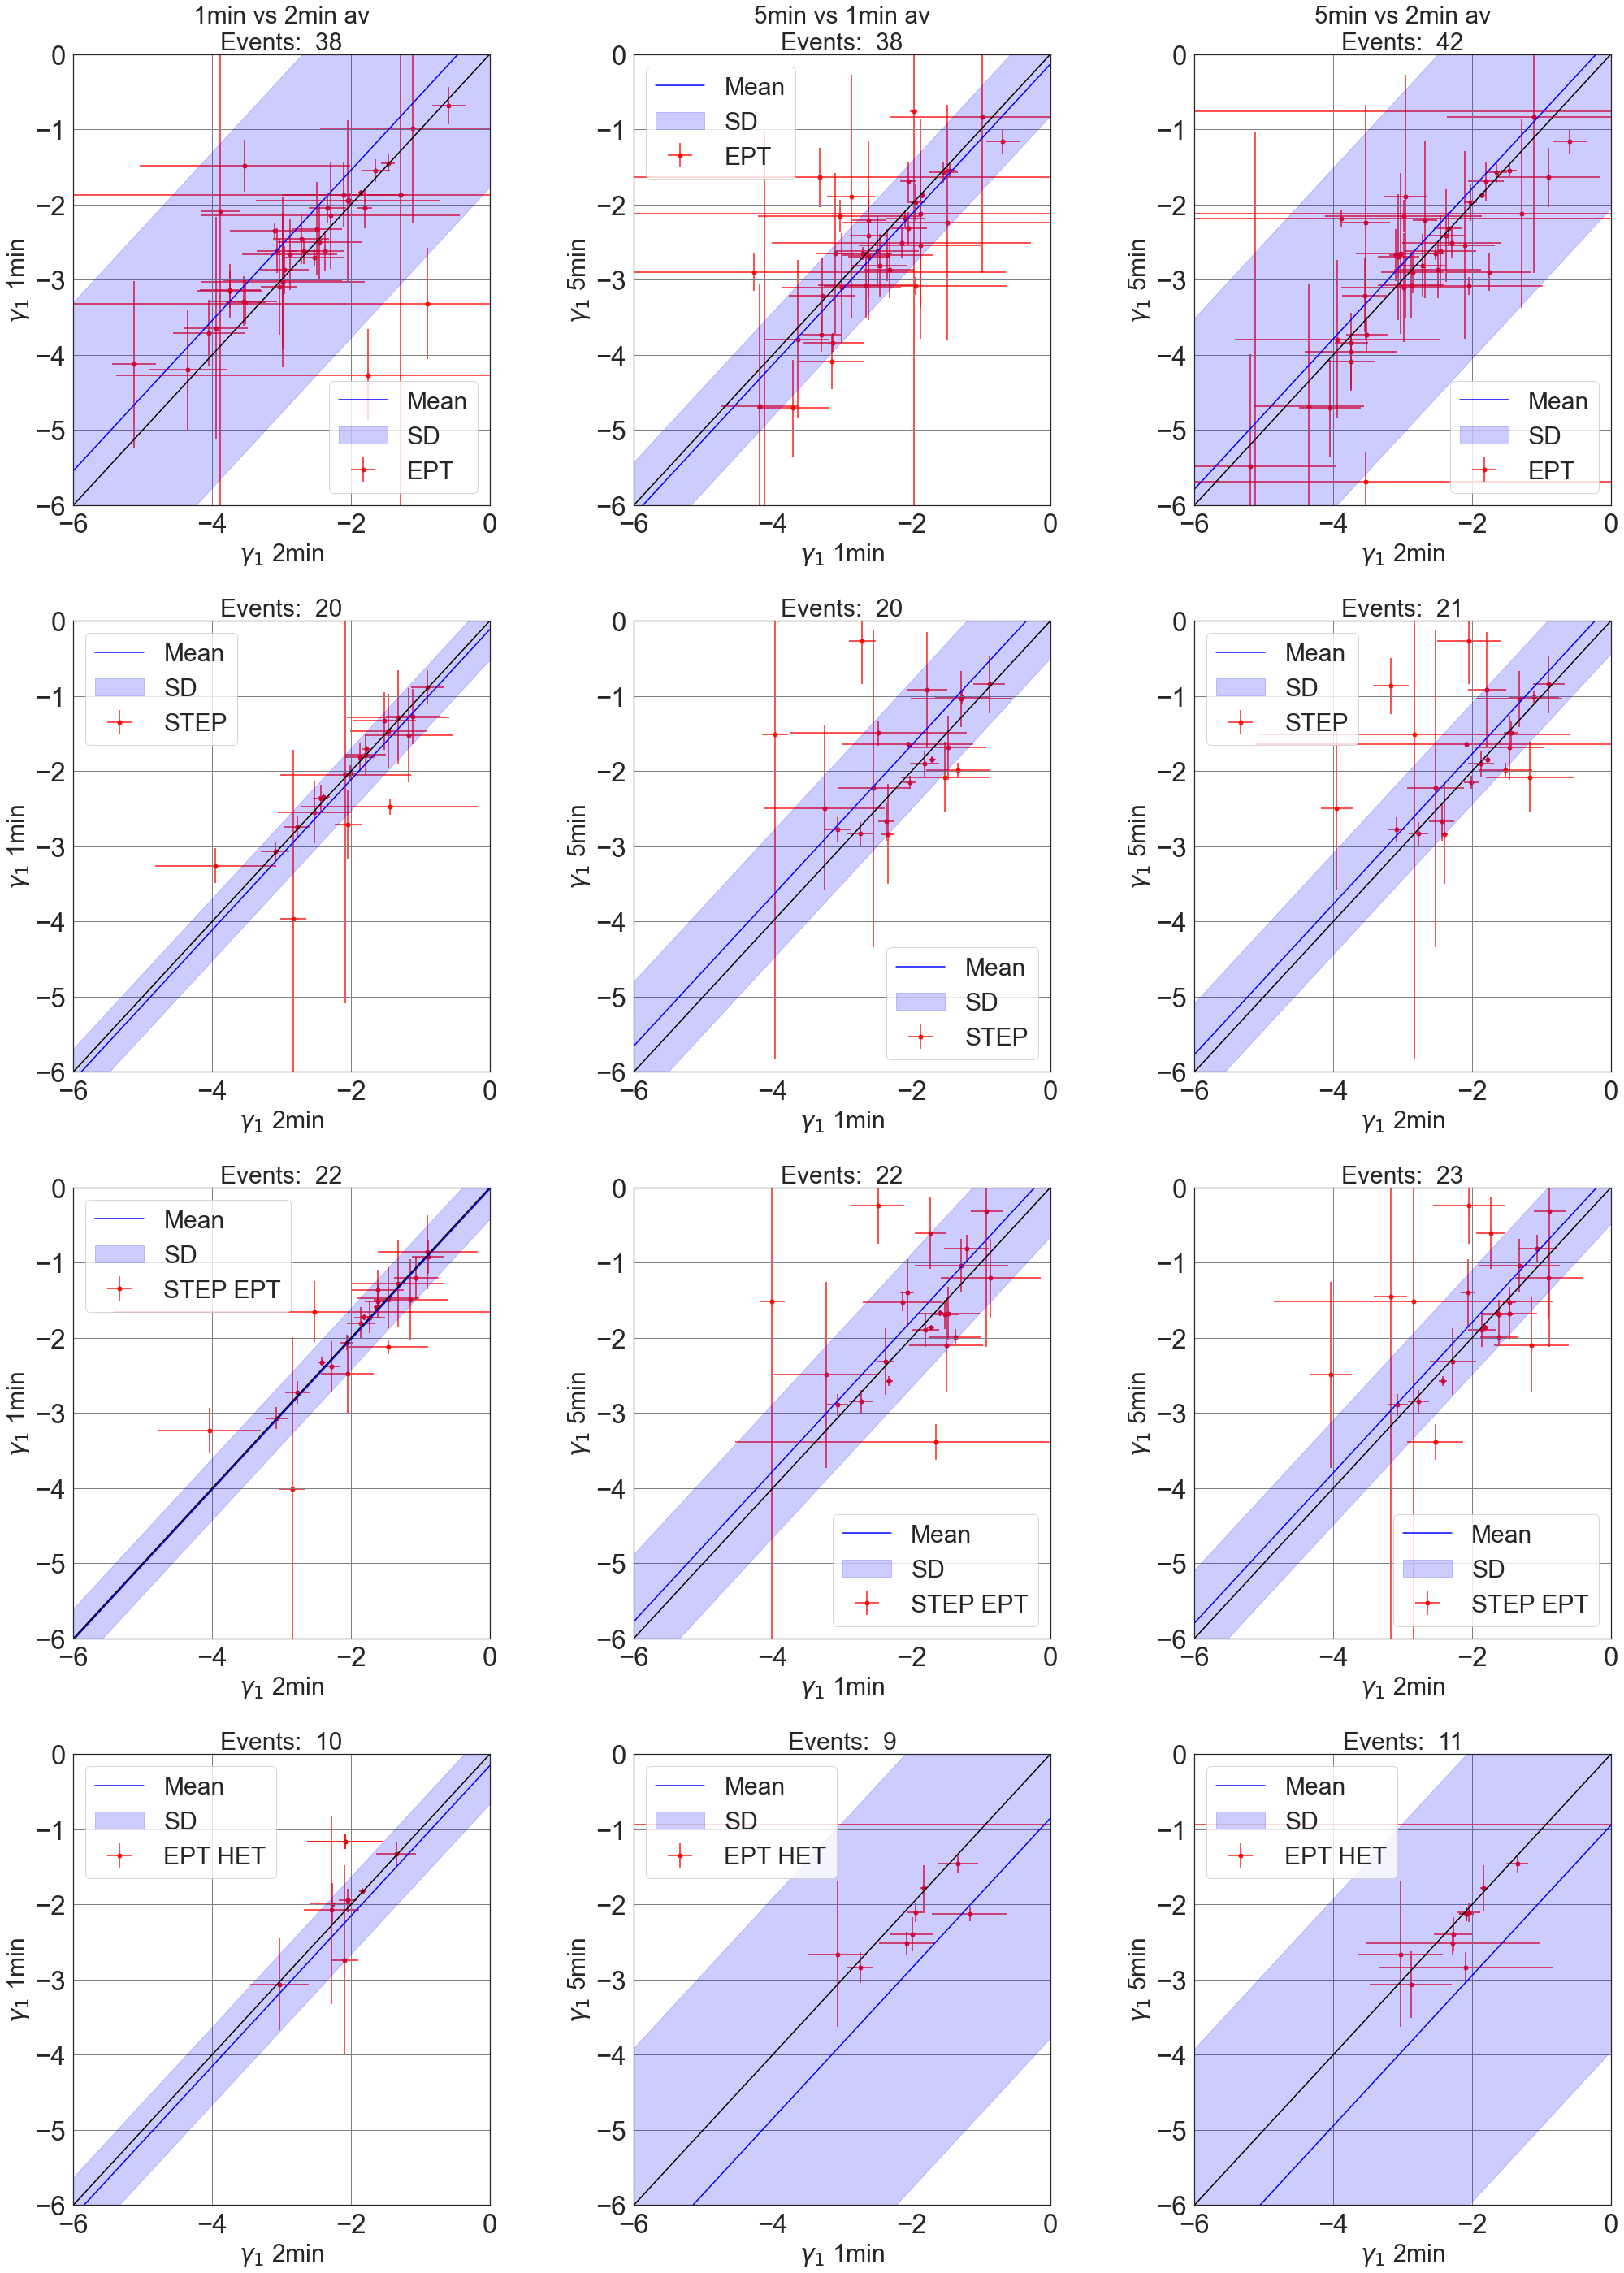

In [27]:
f, ax = plt.subplots(4,3, figsize=(30,40)) 
sns.set_theme(style="white",font_scale = 3)
s = 30
f.tight_layout(pad=2.5)

ax[0,0].errorbar(y=ept_one_two, x=ept_two_one, xerr=ept_one_two_err, yerr=ept_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,0].errorbar(y=step_one_two, x=step_two_one, xerr=step_one_two_err, yerr=step_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP')#, label='Flux average')
ax[2,0].errorbar(y=step_ept_one_two, x=step_ept_two_one, xerr=step_ept_one_two_err, yerr=step_ept_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[3,0].errorbar(y=ept_het_one_two, x=ept_het_two_one, xerr=ept_het_one_two_err, yerr=ept_het_two_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')


ax[0,0].set_title('1min vs 2min av'+'\n'+'Events:  '+ n_ept_one_two, size = s)
ax[1,0].set_title('Events:  '+ n_step_one_two, size = s)
ax[2,0].set_title('Events:  '+ n_step_ept_one_two, size = s)
ax[3,0].set_title('Events:  '+ n_ept_het_one_two, size = s)


ax[0,1].errorbar(x=ept_one_five, y=ept_five_one, xerr=ept_one_five_err, yerr=ept_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,1].errorbar(x=step_one_five, y=step_five_one, xerr=step_one_five_err, yerr=step_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP')#, label='Flux average')
ax[2,1].errorbar(x=step_ept_one_five, y=step_ept_five_one, xerr=step_ept_one_five_err, yerr=step_ept_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[3,1].errorbar(x=ept_het_one_five, y=ept_het_five_one, xerr=ept_het_one_five_err, yerr=ept_het_five_one_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')

ax[0,1].set_title('5min vs 1min av'+'\n'+'Events:  '+ n_ept_one_five, size = s)
ax[1,1].set_title('Events:  '+ n_step_one_five, size = s)
ax[2,1].set_title('Events:  '+ n_step_ept_one_five, size = s)
ax[3,1].set_title('Events:  '+ n_ept_het_one_five, size = s)
    


ax[0,2].errorbar(x=ept_two_five, y=ept_five_two, xerr=ept_two_five_err, yerr=ept_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,2].errorbar(x=step_two_five, y=step_five_two, xerr=step_two_five_err, yerr=step_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP')#, label='Flux average')
ax[2,2].errorbar(x=step_ept_two_five, y=step_ept_five_two, xerr=step_ept_two_five_err, yerr=step_ept_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[3,2].errorbar(x=ept_het_two_five, y=ept_het_five_two, xerr=ept_het_two_five_err, yerr=ept_het_five_two_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')

ax[0,2].set_title('5min vs 2min av'+'\n'+'Events:  '+ n_ept_two_five, size = s)
ax[1,2].set_title('Events:  '+ n_step_two_five, size = s)
ax[2,2].set_title('Events:  '+ n_step_ept_two_five, size = s)
ax[3,2].set_title('Events:  '+ n_ept_het_two_five, size = s)
    
    
ax[0,0].plot(x,y12_ept, color = 'blue', label = 'Mean')
ax[1,0].plot(x,y12_step, color = 'blue', label = 'Mean')
ax[2,0].plot(x,y12_step_ept, color = 'blue', label = 'Mean')
ax[3,0].plot(x,y12_ept_het, color = 'blue', label = 'Mean')


ax[0,1].plot(x,y51_ept, color = 'blue', label = 'Mean')
ax[1,1].plot(x,y51_step, color = 'blue', label = 'Mean')
ax[2,1].plot(x,y51_step_ept, color = 'blue', label = 'Mean')
ax[3,1].plot(x,y51_ept_het, color = 'blue', label = 'Mean')

ax[0,2].plot(x,y52_ept, color = 'blue', label = 'Mean')
ax[1,2].plot(x,y52_step, color = 'blue', label = 'Mean')
ax[2,2].plot(x,y52_step_ept, color = 'blue', label = 'Mean')
ax[3,2].plot(x,y52_ept_het, color = 'blue', label = 'Mean')

ax[0,0].fill_between(x, spanmin12_ept , spanmax12_ept, color = 'blue', alpha = 0.2, label = 'SD')
ax[1,0].fill_between(x, spanmin12_step , spanmax12_step, color = 'blue', alpha = 0.2, label = 'SD')
ax[2,0].fill_between(x, spanmin12_step_ept , spanmax12_step_ept, color = 'blue', alpha = 0.2, label = 'SD')
ax[3,0].fill_between(x, spanmin12_ept_het , spanmax12_ept_het, color = 'blue', alpha = 0.2, label = 'SD')

ax[0,1].fill_between(x, spanmin51_ept , spanmax51_ept, color = 'blue', alpha = 0.2, label = 'SD')
ax[1,1].fill_between(x, spanmin51_step , spanmax51_step, color = 'blue', alpha = 0.2, label = 'SD')
ax[2,1].fill_between(x, spanmin51_step_ept , spanmax51_step_ept, color = 'blue', alpha = 0.2, label = 'SD')
ax[3,1].fill_between(x, spanmin51_ept_het , spanmax51_ept_het, color = 'blue', alpha = 0.2, label = 'SD')

ax[0,2].fill_between(x, spanmin52_ept , spanmax52_ept, color = 'blue', alpha = 0.2, label = 'SD')
ax[1,2].fill_between(x, spanmin52_step , spanmax52_step, color = 'blue', alpha = 0.2, label = 'SD')
ax[2,2].fill_between(x, spanmin52_step_ept , spanmax52_step_ept, color = 'blue', alpha = 0.2, label = 'SD')
ax[3,2].fill_between(x, spanmin52_ept_het , spanmax52_ept_het, color = 'blue', alpha = 0.2, label = 'SD')


for i in range(4):
    ax[i,0].set_xlabel(r'$\gamma_1$ 2min', size=s)
    ax[i,0].set_ylabel(r'$\gamma_1$ 1min', size=s)  
    ax[i,0].grid(color = 'gray')
    ax[i,0].legend(prop={'size': s})
    ax[i,0].plot(x,y, color = 'black')
    ax[i,0].set_xlim(-6,0)
    ax[i,0].set_ylim(-6,0)

    
for i in range(4):
    ax[i,1].set_xlabel(r'$\gamma_1$ 1min', size=s)
    ax[i,1].set_ylabel(r'$\gamma_1$ 5min', size=s)
    ax[i,1].grid(color = 'gray')
    ax[i,1].legend(prop={'size': s})
    ax[i,1].plot(x,y, color = 'black')
    ax[i,1].set_xlim(-6,0)
    ax[i,1].set_ylim(-6,0)


for i in range(4):
    ax[i,2].set_xlabel(r'$\gamma_1$ 2min', size=s)
    ax[i,2].set_ylabel(r'$\gamma_1$ 5min', size=s)
    ax[i,2].grid(color = 'gray')
    ax[i,2].legend(prop={'size': s})
    ax[i,2].plot(x,y, color = 'black')
    ax[i,2].set_xlim(-6,0)
    ax[i,2].set_ylim(-6,0)


plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()
